# Tarea 1

In [2]:
#Solución tarea 1
import pandas as pd
from sklearn.metrics import auc
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn.metrics import precision_score, mean_squared_error, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.svm import SVC,libsvm
import warnings
warnings.filterwarnings('ignore')

#Leemos el dataset
diabetes = pd.read_csv("datos/diabetes.csv", sep=",")

#Dividimos los datos
X = diabetes.drop('class', axis=1)
y = diabetes['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
#Entrenamos el modelo mediante soporte vectorial
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

#Ahora calculamos la metrica AUC
y_score = svc.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label="tested_positive")
print("Los thresholds son: \n")
print(thresholds)
print("Los valores de sensibilidad son: \n")
print(tpr) # imprimir la sensibilidad
print("Los valores de especificidad son: \n")
print(1-fpr) # imprimir la especificidad

#Gráfica
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')
plt.title('AUC')

#Area bajo la curva 
print("El área bajo la curva del modelo es: ")
auc(fpr, tpr)


Los thresholds son: 

[ 3.92283028  2.92283028  2.15214707  2.01512077  1.28714002  1.1982755
  1.00107779  0.89359292  0.72137361  0.69170182  0.46660111  0.44730667
  0.29518002  0.26810683  0.2326208   0.22564974  0.16557231  0.10430189
  0.09188037 -0.21552157 -0.2728277  -0.32474526 -0.45765944 -0.49140244
 -0.63588349 -0.69962716 -0.73849379 -0.76076485 -0.76464031 -0.82457025
 -0.82712474 -0.88076151 -0.90267068 -0.93673342 -0.94996754 -0.95255769
 -0.97089121 -1.02947535 -1.03733123 -1.0522595  -1.07013033 -1.30799858
 -1.32502737 -1.43803039 -1.44047823 -1.49686569 -1.49779002 -1.57571114
 -1.59931372 -1.93759745 -1.98881304 -3.46239507 -3.54642741 -3.68128371
 -3.91457013 -5.45179902]
Los valores de sensibilidad son: 

[0.         0.01785714 0.07142857 0.07142857 0.26785714 0.26785714
 0.30357143 0.30357143 0.39285714 0.39285714 0.48214286 0.48214286
 0.5        0.5        0.51785714 0.51785714 0.55357143 0.55357143
 0.57142857 0.57142857 0.60714286 0.60714286 0.66071429 0.66

0.8021137026239066

Observamos que el AUC mediante SVC nos da un valor de 0.8075141533710756 y el AUC mediante regresion lineal nos da un valor de 0.8355941399891481, por lo que podemos concluir que el modelo mediante regresion lineal es levemente mejor.

# Tarea 2

## Aprendizaje supervizado

In [3]:
#Solucion tarea 2
mushrooms = pd.read_csv("dataset tarea/mushrooms.csv", sep=",")
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#Observamos que los datos están de tipo string, se necesitan en numéricos, por lo que procedemos a convertirlos en su codigo
#Respectivo ascii
for column in mushrooms.columns:
    mushrooms[column] = [ord(row) for row in mushrooms[column]]
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,112,120,115,110,116,112,102,99,110,107,...,115,119,119,112,119,111,112,107,115,117
1,101,120,115,121,116,97,102,99,98,107,...,115,119,119,112,119,111,112,110,110,103
2,101,98,115,119,116,108,102,99,98,110,...,115,119,119,112,119,111,112,110,110,109
3,112,120,121,119,116,112,102,99,110,110,...,115,119,119,112,119,111,112,107,115,117
4,101,120,115,103,102,110,102,119,98,107,...,115,119,119,112,119,111,101,110,97,103


In [5]:
#Tenemos dos clases p y e, se debe convertir a binario donde p es = 0 y e=1
X = mushrooms.drop('class', axis=1)
y = mushrooms['class']
y[y == 112] = 1 #p
y[y == 101] = 0 #e
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,120,115,110,116,112,102,99,110,107,...,115,119,119,112,119,111,112,107,115,117
1,0,120,115,121,116,97,102,99,98,107,...,115,119,119,112,119,111,112,110,110,103
2,0,98,115,119,116,108,102,99,98,110,...,115,119,119,112,119,111,112,110,110,109
3,1,120,121,119,116,112,102,99,110,110,...,115,119,119,112,119,111,112,107,115,117
4,0,120,115,103,102,110,102,119,98,107,...,115,119,119,112,119,111,101,110,97,103


In [7]:

#Prodecemos a hacer machine learning
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [22]:
model = Sequential()
model.add(Dense(400, input_dim=22, activation='tanh'))
model.add(Dense(200, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
warnings.filterwarnings('ignore')

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
warnings.filterwarnings('ignore')

model.fit(X, y, epochs=40, batch_size=200)
warnings.filterwarnings('ignore')



Epoch 1/40
8124/8124 [==============================] - 1s 100us/step - loss: 0.5094 - acc: 0.7691
Epoch 2/40
8124/8124 [==============================] - 0s 11us/step - loss: 0.2828 - acc: 0.8952
Epoch 3/40
8124/8124 [==============================] - 0s 11us/step - loss: 0.2142 - acc: 0.9202
Epoch 4/40
8124/8124 [==============================] - 0s 11us/step - loss: 0.1887 - acc: 0.9328
Epoch 5/40
8124/8124 [==============================] - 0s 11us/step - loss: 0.1810 - acc: 0.9309
Epoch 6/40
8124/8124 [==============================] - 0s 11us/step - loss: 0.1500 - acc: 0.9456
Epoch 7/40
8124/8124 [==============================] - 0s 10us/step - loss: 0.1624 - acc: 0.9372
Epoch 8/40
8124/8124 [==============================] - 0s 11us/step - loss: 0.1975 - acc: 0.9205
Epoch 9/40
8124/8124 [==============================] - 0s 11us/step - loss: 0.1319 - acc: 0.9538
Epoch 10/40
8124/8124 [==============================] - 0s 11us/step - loss: 0.1527 - acc: 0.9461
Epoch 11/40
8124/8

In [23]:
predictions = model.predict_classes(X)
for i in range(10):
    print('%d => %s (expected %s)' % (i+1, predictions[i] , y[i]))

1 => [1] (expected 1)
2 => [0] (expected 0)
3 => [0] (expected 0)
4 => [1] (expected 1)
5 => [0] (expected 0)
6 => [0] (expected 0)
7 => [0] (expected 0)
8 => [0] (expected 0)
9 => [1] (expected 1)
10 => [0] (expected 0)


Analizamos los 10 primeros resultados y vemos que obtiene los resultados esperados, dado que el modelo presenta una precisión de de 0.9746. Es muy posible que si analizamos los siguientes resultamos nos encontremos uno erroneo.

## Aprendizaje no supervisado

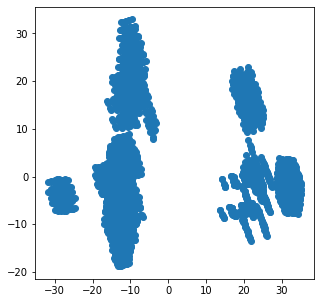

In [10]:
#Importamos librerias
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X) #Normalizamos datos
N=mushrooms.values
pca = PCA(n_components=2) #Imprimimos solo dos características
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

#Esto nos da una guia visual de mas o menos cuantos clusters o grupos existen en nuestro dataset




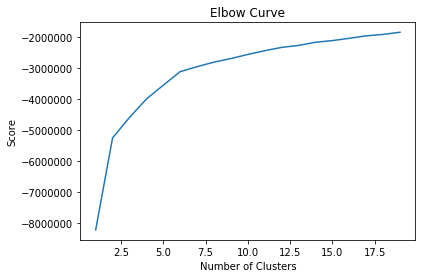

In [16]:
#Usamos el método del codo para saber cuantos clusters usar
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


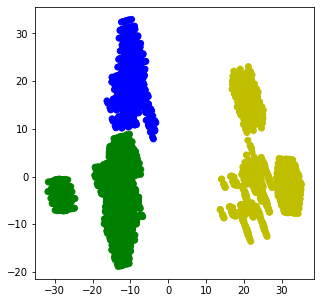

In [32]:
from sklearn.cluster import KMeans
#Observamos que en 3 esta mas o menos el codo, procedemos a usar k means y ploteamos los clusters
kmeans = KMeans(n_clusters=3,random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2 : 'b',
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()